# Web Scraping

As a simple example of webscraping, we'd like to make a small library of images downloaded from Bing.

In [1]:
# Adjust the path to your repo
path_to_repo = '/Users/ruben/repo/personal/ga/DAT-23-NYC/'

In [2]:
query = 'cats with hats'  # only use normal characters (azAZ10) and spaces

- Download the webpage
- mine the html code
- find the relevant images
- download the images to disk

## The Do-It-Yourself Way

- The package `requests` let you make HTTP requests like GET and POST.
- To install the package, simply type in your terminal:

    ```pip install requests```

In [3]:
import requests

In [4]:
url = 'http://www.bing.com/images/search?q=' + query.replace(' ', '\%20')
req = requests.get(url)
html = req.text

In [5]:
print html[:300]  # print first characters from html page

<!DOCTYPE html><html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:Web="http://schemas.live.com/Web/"><head><meta content="text/html; charset=utf-8" http-equiv="content-type" /><script type="text/javascript">//<![CDATA[
si_ST=new Date
//]]></script><script type="text/javascript"


- Have a look at how the html looks, and try to parse the file yourself.
- We noticed that the search results are always of the form `<img class="img_hid" src2="https://tse4.mm.bing.net/th?id=JN.8aaYIEhuqMgwcBHAyaTh2A&amp;w=221&amp;h=172&amp;c=7&amp;rs=1&amp;qlt=90&amp;o=4&amp;pid=1.1" style="width:221px;height:172px;" width="221" height="172"/>`
- So let's look for the pattern `<img class="img_hid" src2="`

In [6]:
q = '<img class="img_hid" src2="'

urls = []
pos, end = 0, 0
while html[end:].find(q) >= 0:
    pos = pos + html[pos:].find(q) + len(q)  # go to position of image url
    end = pos + html[pos:].find('"')  # look for end of image url
    urls.append(html[pos:end])
print "Found", len(urls), "links"

Found 35 links


In [7]:
# create folder and subfolders for the image library
import os
path_to_imgs = path_to_repo + 'data/images/' + query.replace(' ', '_') + '/'
try:
    os.makedirs(path_to_imgs)  
except OSError as e:
    if e.errno != 17:  # if folder already exists, no problem (just overwrite)
        raise e  # otherwise, raise e again
print "Creating folder", path_to_imgs

Creating folder /Users/ruben/repo/personal/ga/DAT-23-NYC/data/images/cats_with_hats/


In [8]:
for no, url in enumerate(urls):
    req = requests.get(url)
    save_as_file = path_to_imgs + '%03d' % no + '.jpeg'
    with open(save_as_file, 'wb') as f:
        f.write(req.content)
print "Saved", len(urls), "images!"

Saved 35 images!


Let's see if we indeed have an appropriate picture downloaded to disk.

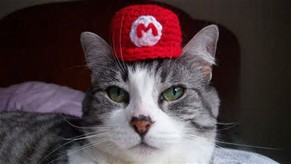

In [27]:
from IPython.display import Image
Image(filename=path_to_imgs + '001.jpeg')

## BeautifulSoup

- The package `BeautifulSoup` will help you navigating through the HTML code
- to install the package, simply type `pip install beautifulsoup4` 
- Documentation is available on their <a href="http://www.crummy.com/software/BeautifulSoup/">website</a>
- Especially have a look at their <a href="http://www.crummy.com/software/BeautifulSoup/bs4/doc/">Quick Start</a>

In [10]:
import BeautifulSoup

Instead of parsing the `html` page yourself, you feed it into `BeautifulSoup`.

In [11]:
soup = BeautifulSoup.BeautifulSoup(html)

The `soup` object saves all the html page's attributes as class attributes:

In [12]:
soup.title

<title>cats\ with\ hats - Bing Images</title>

In [13]:
soup.title.name

u'title'

In [14]:
soup.title.string

u'cats\\ with\\ hats - Bing Images'

In [15]:
soup.title.parent.name

u'head'

One common task is extracting all the URLs found within a page’s `<a>` tags.

In [16]:
# Let's limit to first 5
for link in soup.findAll('a')[:5]:  
    print(link.get('href'))

/search?q=cats%5c+with%5c+hats&FORM=HDRSC1
/images?FORM=HDRSC2
/videos/search?q=cats%5c+with%5c+hats&FORM=HDRSC3
/maps/default.aspx?q=cats%5c+with%5c+hats&mkt=en&FORM=HDRSC4
/news/search?q=cats%5c+with%5c+hats&FORM=HDRSC6


- Let's look for all pictures.
- We already saw earlier that the picture we're interested in are the ones with `<img>` tags with `src2` attributes, rather than `src`.

In [17]:
# Let's look for all pictures with src2 attributes
urls = []
for img in soup.findAll('img'):
    if img.get('src2'):
        urls.append(img.get('src2'))
print "Found", len(urls), "images"

Found 35 images


In [18]:
# create folder and subfolders for the image library
import os
path_to_imgs = path_to_repo + 'data/images/' + query.replace(' ', '_') + '_bs/'  # add bs tag
try:
    os.makedirs(path_to_imgs)  
except OSError as e:
    if e.errno != 17:  # if folder already exists, no problem (just overwrite)
        raise e  # otherwise, raise e again
print "Creating folder", path_to_imgs

Creating folder /Users/ruben/repo/personal/ga/DAT-23-NYC/data/images/cats_with_hats_bs/


In [19]:
for no, url in enumerate(urls):
    req = requests.get(url)
    save_as_file = path_to_imgs + '%03d' % no + '.jpeg'
    with open(save_as_file, 'wb') as f:
        f.write(req.content)
print "Saved", len(urls), "images!"

Saved 35 images!


## import.io

- The website <a href="https://import.io/">import.io</a> tries to automatize webscraping.
- It doesn't work flawless, but it definitely gets you started if you quickly need some sample data
- Have a look at the website and try to scrape another webpage. (Note that Bing might not be the best example to test out this engine.)

## Exercises

- Scrape your favorite site and save your valuable new-found data to disk!

- (**) Note that Bing is a dynamic website that automatically shows more pictures. We only found some small number of images, though. Is it possible to get a hundred or a thousand images? (Honestly, this can be quite a headache, and I don't know if it's easy to do.)